<a href="https://colab.research.google.com/github/Marudhan/FINAL_YEAR_PROJECT/blob/main/AL6061_TRAIL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Sample dataset (Replace with actual experimental data)
data = {
    'Al6061_fraction': [1.0, 0.95, 0.95, 0.95, 0.90],
    'B4C_fraction': [0.0, 0.05, 0.00, 0.04, 0.04],
    'Biochar_fraction': [0.0, 0.0, 0.05, 0.01, 0.06],
    'Density': [2700, 2685, 2557.5, 2632.5, 2562],
    'Youngs_Modulus': [70, 88, 66.4, 87.6, 79.2],
    'Thermal_Conductivity': [167, 160.4, 151, 157.5, 149],
    'Tensile_Strength': [310, 350, 290, 340, 330],
    'Compression_Strength': [420, 460, 400, 450, 440],
    'Impact_Strength': [35, 40, 30, 38, 37],
    'Flexural_Strength': [500, 540, 480, 530, 520]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features (X) and target variables (y)
X = df[['Al6061_fraction', 'B4C_fraction', 'Biochar_fraction']]
y_columns = ['Density', 'Youngs_Modulus', 'Thermal_Conductivity',
             'Tensile_Strength', 'Compression_Strength', 'Impact_Strength', 'Flexural_Strength']

# Split data and train Random Forest models for each target variable
models = {}

for y_col in y_columns:
    X_train, X_test, y_train, y_test = train_test_split(X, df[y_col], test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    models[y_col] = model

# Function to predict mechanical properties for given material compositions
def predict_properties(al6061, b4c, biochar):
    input_data = np.array([[al6061, b4c, biochar]])
    predictions = {prop: model.predict(input_data)[0] for prop, model in models.items()}
    return predictions

# Predict for all 5 combinations
samples = [
    [1.0, 0.0, 0.0],   # 100% Al6061
    [0.95, 0.05, 0.0], # 95% Al6061 + 5% B4C
    [0.95, 0.0, 0.05], # 95% Al6061 + 5% Biochar
    [0.95, 0.04, 0.01],# 95% Al6061 + 4% B4C + 1% Biochar
    [0.90, 0.04, 0.06] # 90% Al6061 + 4% B4C + 6% Biochar
]

# Print predictions in tabular form
print("Predicted Mechanical and Thermal Properties:")
print("-" * 100)
print(f"{'Composition':<35}{'Density':<10}{'Youngs Modulus':<15}{'Thermal Cond.':<15}"
      f"{'Tensile':<10}{'Compression':<12}{'Impact':<10}{'Flexural':<10}")
print("-" * 100)

for i, sample in enumerate(samples):
    predictions = predict_properties(*sample)
    print(f"{i+1}. {sample}   "
          f"{predictions['Density']:.2f}     {predictions['Youngs_Modulus']:.2f}       "
          f"{predictions['Thermal_Conductivity']:.2f}      {predictions['Tensile_Strength']:.2f}      "
          f"{predictions['Compression_Strength']:.2f}     {predictions['Impact_Strength']:.2f}     "
          f"{predictions['Flexural_Strength']:.2f}")

print("-" * 100)

Predicted Mechanical and Thermal Properties:
----------------------------------------------------------------------------------------------------
Composition                        Density   Youngs Modulus Thermal Cond.  Tensile   Compression Impact    Flexural  
----------------------------------------------------------------------------------------------------
1. [1.0, 0.0, 0.0]   2670.15     69.91       163.25      306.10      416.10     33.80     496.10
2. [0.95, 0.05, 0.0]   2628.41     81.07       157.94      328.60      438.60     36.41     518.60
3. [0.95, 0.0, 0.05]   2575.97     72.26       152.70      305.00      415.00     32.61     495.00
4. [0.95, 0.04, 0.01]   2618.28     83.00       156.24      331.90      441.90     36.86     521.90
5. [0.9, 0.04, 0.06]   2571.86     80.53       150.72      330.10      440.10     35.79     520.10
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Hardness: 79.19 HV
Predicted Wear Resistance: 0.169 mm³/Nm
Predicted Fatigue Strength: 269.90 MPa


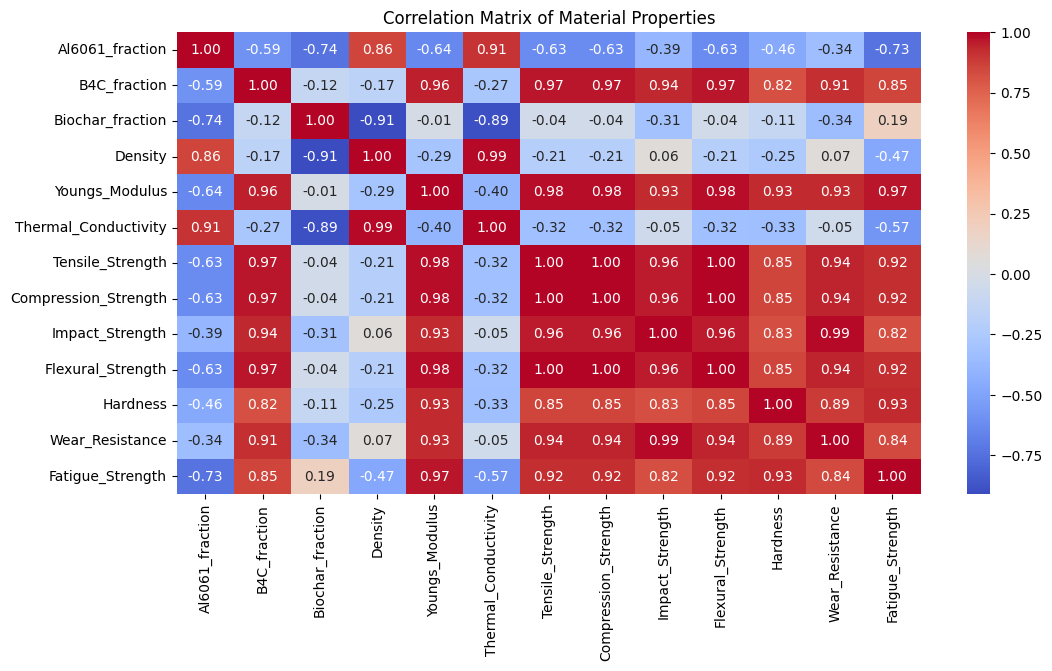

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

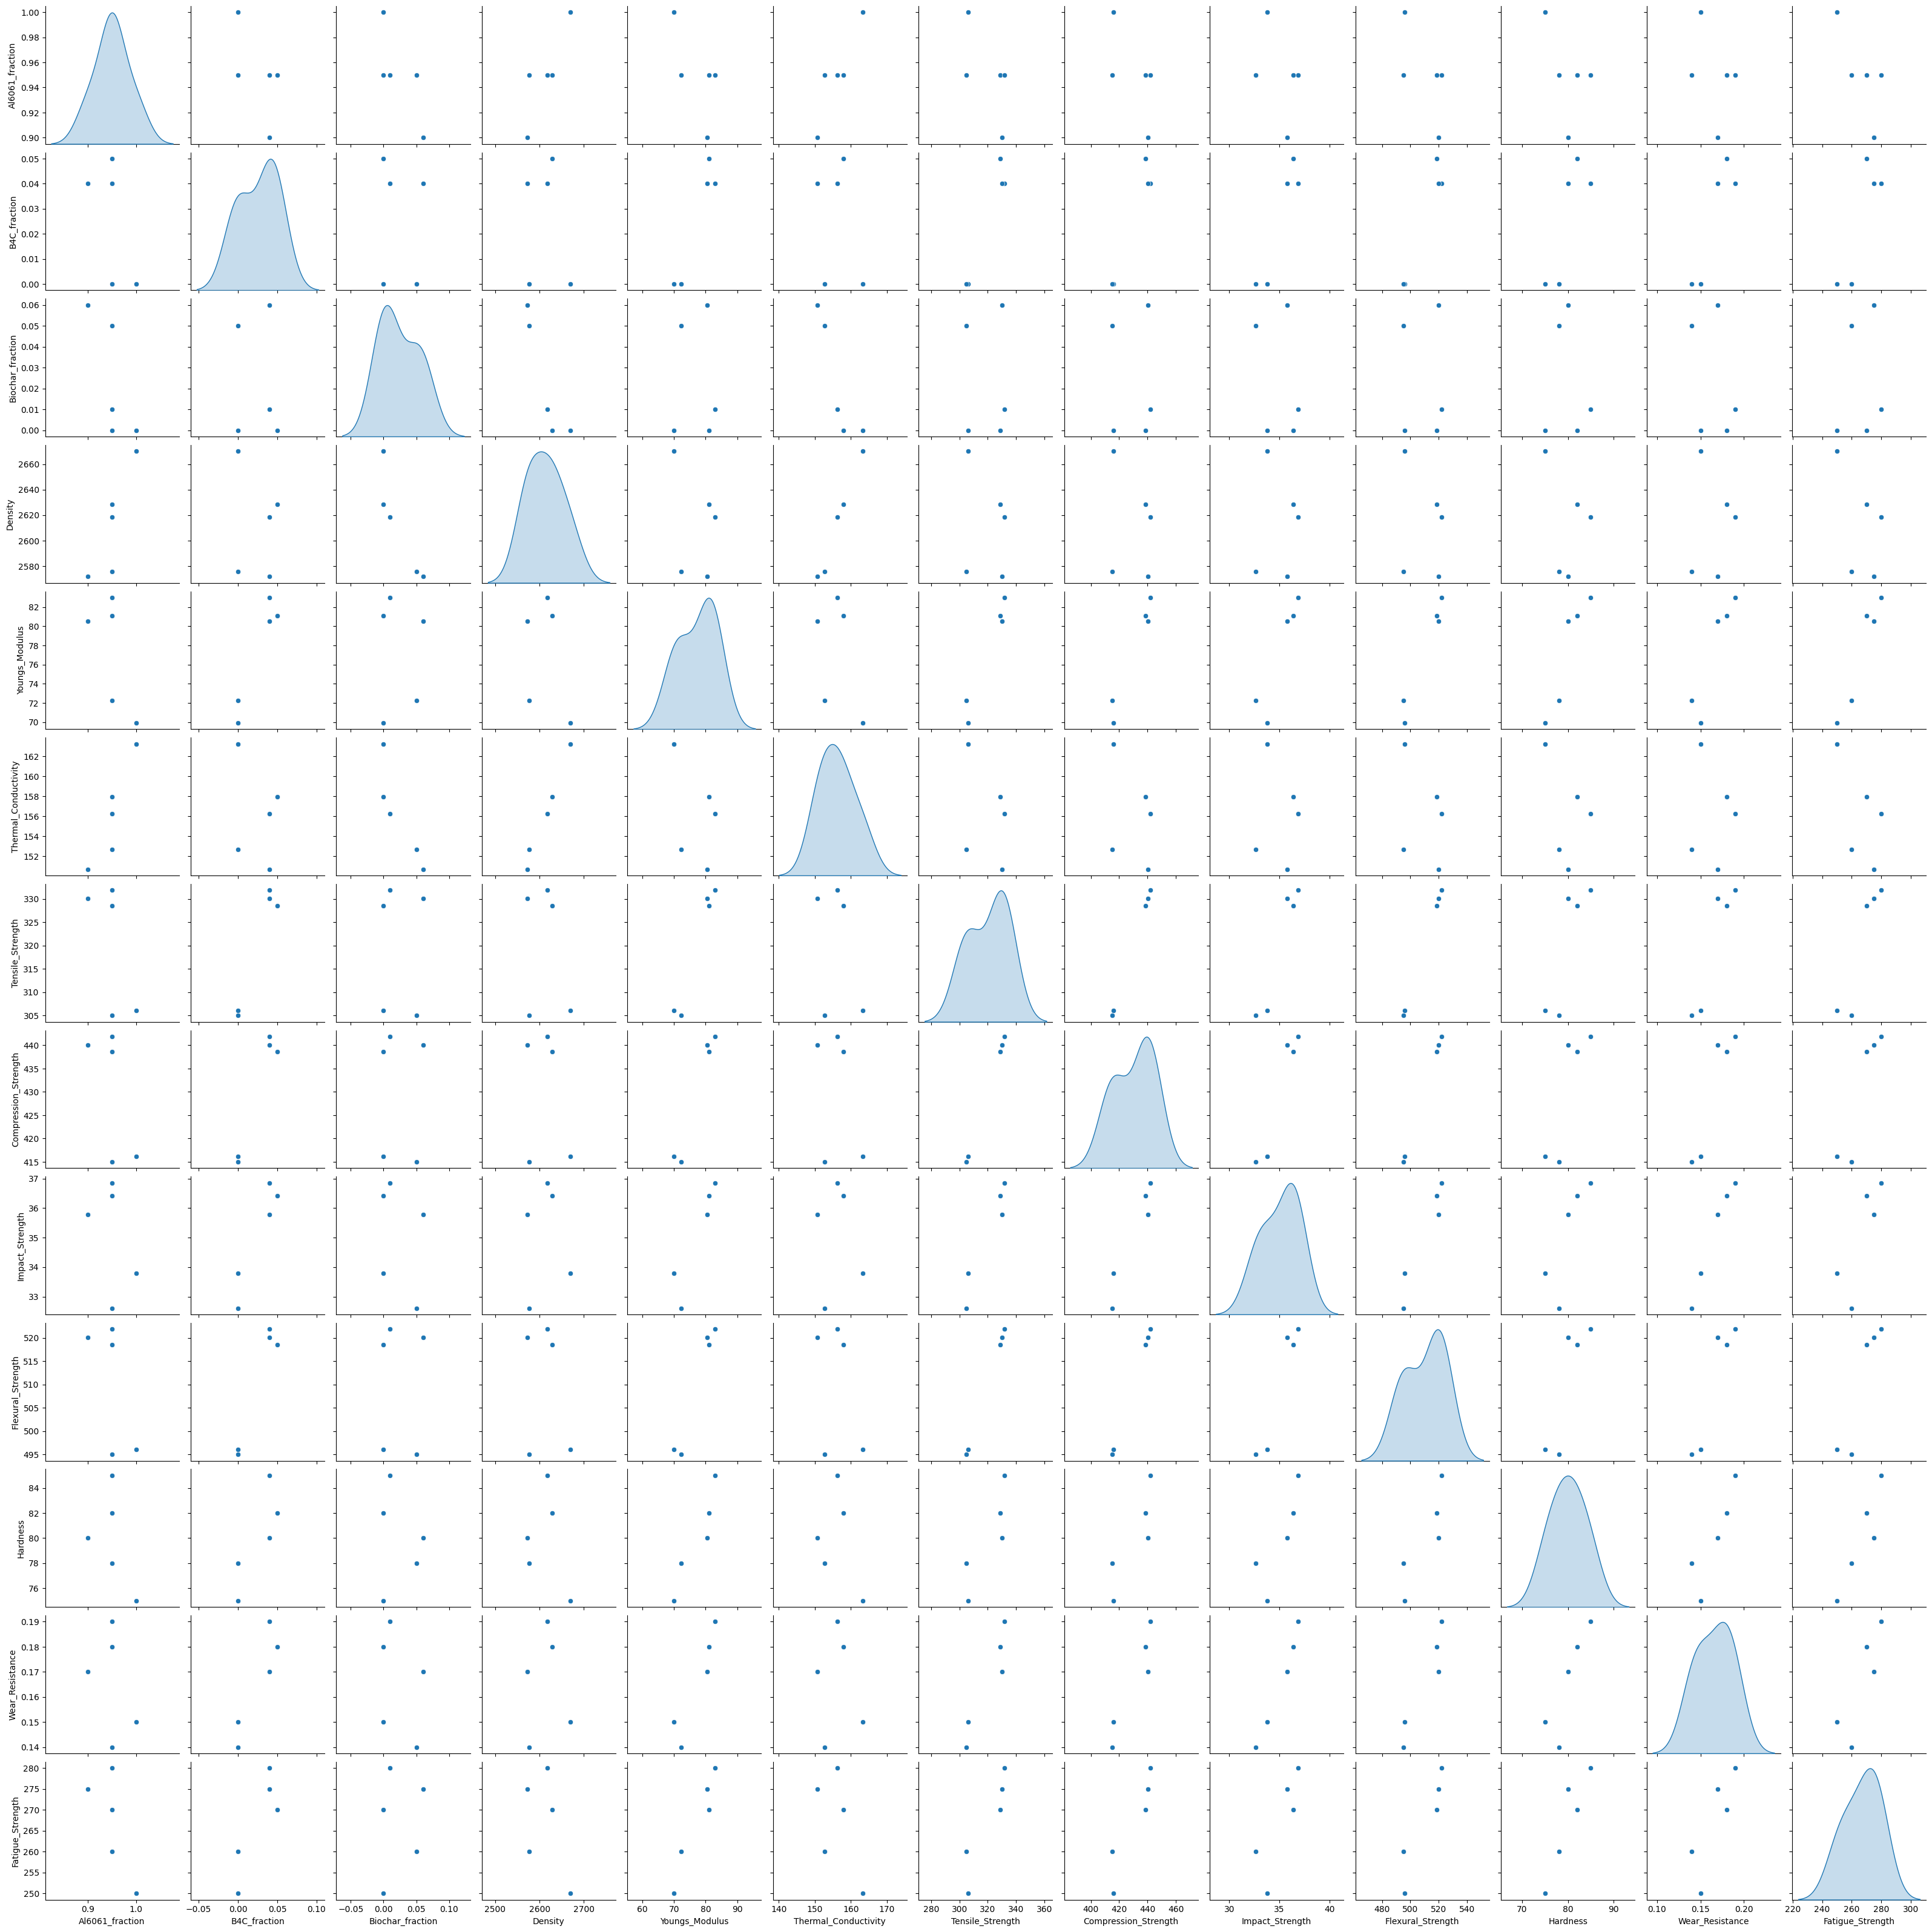

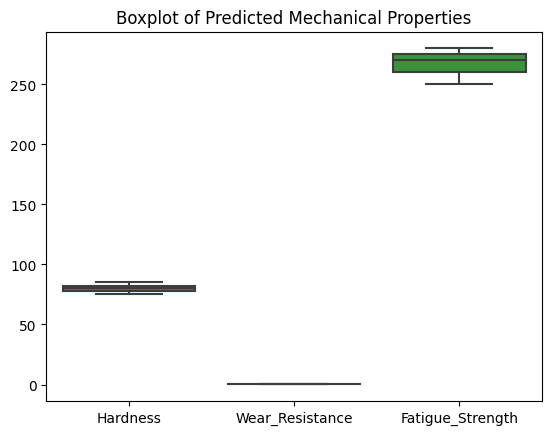

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Sample dataset (Replace with real experimental data)
data = {
    'Al6061_fraction': [1.0, 0.95, 0.95, 0.95, 0.90],
    'B4C_fraction': [0.0, 0.05, 0.0, 0.04, 0.04],
    'Biochar_fraction': [0.0, 0.0, 0.05, 0.01, 0.06],
    'Density': [2670.15, 2628.41, 2575.97, 2618.28, 2571.86],
    'Youngs_Modulus': [69.91, 81.07, 72.26, 83.00, 80.53],
    'Thermal_Conductivity': [163.25, 157.94, 152.70, 156.24, 150.72],
    'Tensile_Strength': [306.10, 328.60, 305.00, 331.90, 330.10],
    'Compression_Strength': [416.10, 438.60, 415.00, 441.90, 440.10],
    'Impact_Strength': [33.80, 36.41, 32.61, 36.86, 35.79],
    'Flexural_Strength': [496.10, 518.60, 495.00, 521.90, 520.10],
    'Hardness': [75, 82, 78, 85, 80],  # Hypothetical values
    'Wear_Resistance': [0.15, 0.18, 0.14, 0.19, 0.17],  # Hypothetical values
    'Fatigue_Strength': [250, 270, 260, 280, 275]  # Hypothetical values
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features (X) and target variables (y)
X = df[['Density', 'Youngs_Modulus', 'Thermal_Conductivity', 'Tensile_Strength',
        'Compression_Strength', 'Impact_Strength', 'Flexural_Strength']]
y_hardness = df['Hardness']
y_wear = df['Wear_Resistance']
y_fatigue = df['Fatigue_Strength']

# Split data into training and testing sets
X_train, X_test, y_hardness_train, y_hardness_test = train_test_split(X, y_hardness, test_size=0.2, random_state=42)
X_train, X_test, y_wear_train, y_wear_test = train_test_split(X, y_wear, test_size=0.2, random_state=42)
X_train, X_test, y_fatigue_train, y_fatigue_test = train_test_split(X, y_fatigue, test_size=0.2, random_state=42)

# Train Random Forest models
model_hardness = RandomForestRegressor(n_estimators=100, random_state=42)
model_wear = RandomForestRegressor(n_estimators=100, random_state=42)
model_fatigue = RandomForestRegressor(n_estimators=100, random_state=42)

model_hardness.fit(X_train, y_hardness_train)
model_wear.fit(X_train, y_wear_train)
model_fatigue.fit(X_train, y_fatigue_train)

# Function to predict additional mechanical properties
def predict_additional_properties(density, modulus, conductivity, tensile, compression, impact, flexural):
    input_data = np.array([[density, modulus, conductivity, tensile, compression, impact, flexural]])
    hardness = model_hardness.predict(input_data)[0]
    wear_resistance = model_wear.predict(input_data)[0]
    fatigue_strength = model_fatigue.predict(input_data)[0]
    return hardness, wear_resistance, fatigue_strength

# Example Prediction
new_sample = [2650, 80, 160, 320, 430, 35, 510]  # Modify as needed
predicted_hardness, predicted_wear, predicted_fatigue = predict_additional_properties(*new_sample)

print(f"Predicted Hardness: {predicted_hardness:.2f} HV")
print(f"Predicted Wear Resistance: {predicted_wear:.3f} mm³/Nm")
print(f"Predicted Fatigue Strength: {predicted_fatigue:.2f} MPa")

# Data Analysis Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Material Properties")
plt.show()

sns.pairplot(df, diag_kind='kde')
plt.show()

sns.boxplot(data=df[['Hardness', 'Wear_Resistance', 'Fatigue_Strength']])
plt.title("Boxplot of Predicted Mechanical Properties")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Hardness: 79.19 HV
Predicted Wear Resistance: 0.169 mm³/Nm
Predicted Fatigue Strength: 269.90 MPa


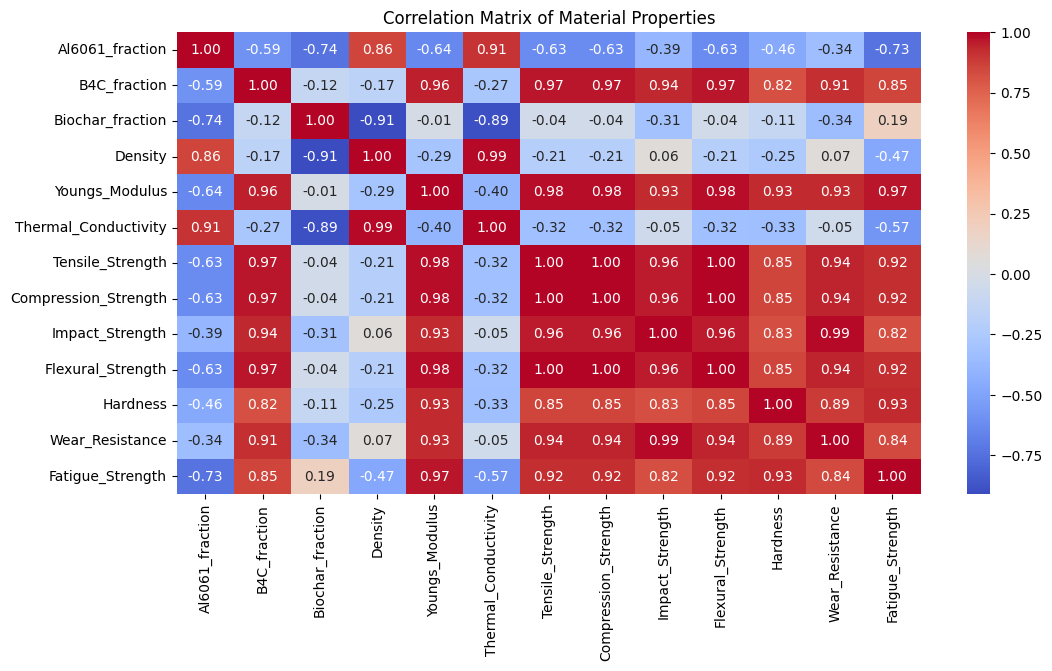

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

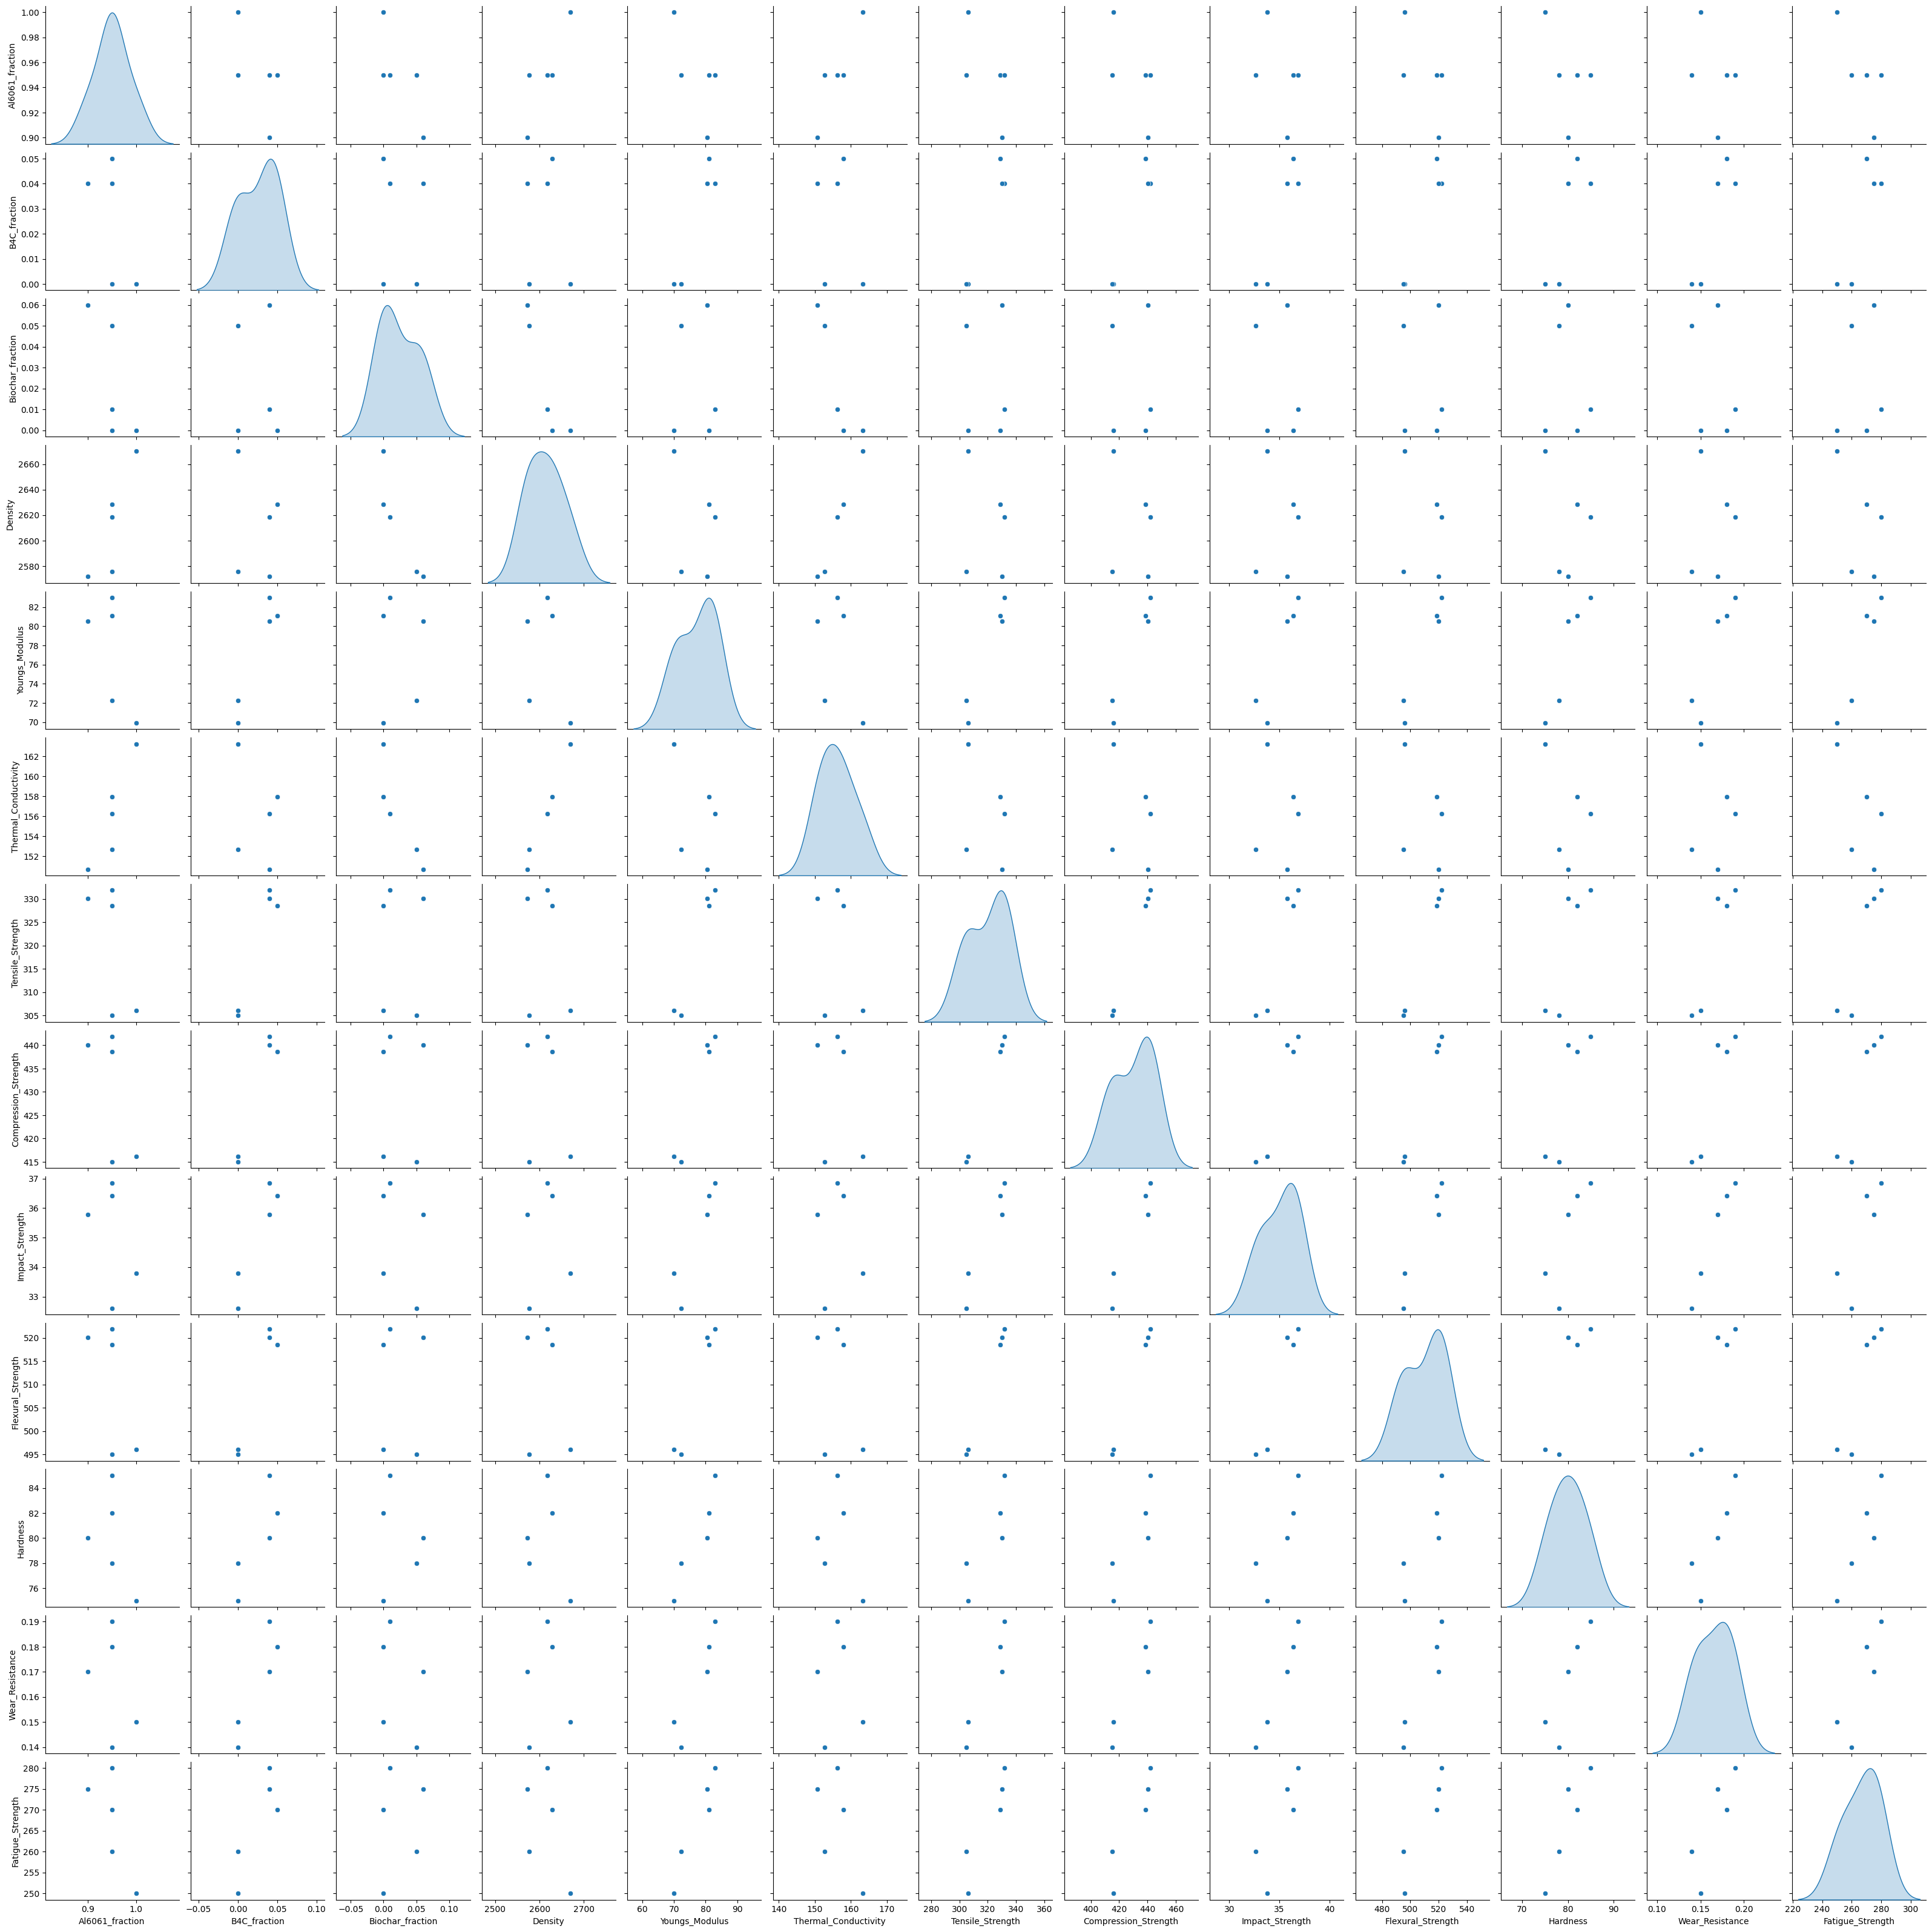

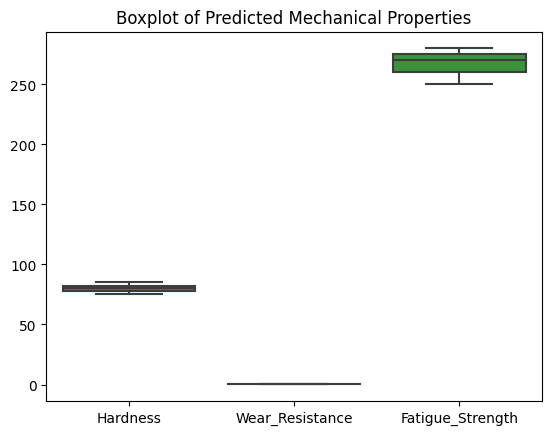

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Sample dataset (Replace with real experimental data)
data = {
    'Al6061_fraction': [1.0, 0.95, 0.95, 0.95, 0.90],
    'B4C_fraction': [0.0, 0.05, 0.0, 0.04, 0.04],
    'Biochar_fraction': [0.0, 0.0, 0.05, 0.01, 0.06],
    'Density': [2670.15, 2628.41, 2575.97, 2618.28, 2571.86],
    'Youngs_Modulus': [69.91, 81.07, 72.26, 83.00, 80.53],
    'Thermal_Conductivity': [163.25, 157.94, 152.70, 156.24, 150.72],
    'Tensile_Strength': [306.10, 328.60, 305.00, 331.90, 330.10],
    'Compression_Strength': [416.10, 438.60, 415.00, 441.90, 440.10],
    'Impact_Strength': [33.80, 36.41, 32.61, 36.86, 35.79],
    'Flexural_Strength': [496.10, 518.60, 495.00, 521.90, 520.10],
    'Hardness': [75, 82, 78, 85, 80],  # Hypothetical values
    'Wear_Resistance': [0.15, 0.18, 0.14, 0.19, 0.17],  # Hypothetical values
    'Fatigue_Strength': [250, 270, 260, 280, 275]  # Hypothetical values
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features (X) and target variables (y)
X = df[['Density', 'Youngs_Modulus', 'Thermal_Conductivity', 'Tensile_Strength',
        'Compression_Strength', 'Impact_Strength', 'Flexural_Strength']]
y_hardness = df['Hardness']
y_wear = df['Wear_Resistance']
y_fatigue = df['Fatigue_Strength']

# Split data into training and testing sets
X_train, X_test, y_hardness_train, y_hardness_test = train_test_split(X, y_hardness, test_size=0.2, random_state=42)
X_train, X_test, y_wear_train, y_wear_test = train_test_split(X, y_wear, test_size=0.2, random_state=42)
X_train, X_test, y_fatigue_train, y_fatigue_test = train_test_split(X, y_fatigue, test_size=0.2, random_state=42)

# Train Random Forest models
model_hardness = RandomForestRegressor(n_estimators=100, random_state=42)
model_wear = RandomForestRegressor(n_estimators=100, random_state=42)
model_fatigue = RandomForestRegressor(n_estimators=100, random_state=42)

model_hardness.fit(X_train, y_hardness_train)
model_wear.fit(X_train, y_wear_train)
model_fatigue.fit(X_train, y_fatigue_train)

# Function to predict additional mechanical properties
def predict_additional_properties(density, modulus, conductivity, tensile, compression, impact, flexural):
    input_data = np.array([[density, modulus, conductivity, tensile, compression, impact, flexural]])
    hardness = model_hardness.predict(input_data)[0]
    wear_resistance = model_wear.predict(input_data)[0]
    fatigue_strength = model_fatigue.predict(input_data)[0]
    return hardness, wear_resistance, fatigue_strength

# Example Prediction
new_sample = [2650, 80, 160, 320, 430, 35, 510]  # Modify as needed
predicted_hardness, predicted_wear, predicted_fatigue = predict_additional_properties(*new_sample)

print(f"Predicted Hardness: {predicted_hardness:.2f} HV")
print(f"Predicted Wear Resistance: {predicted_wear:.3f} mm³/Nm")
print(f"Predicted Fatigue Strength: {predicted_fatigue:.2f} MPa")

# Data Analysis Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Material Properties")
plt.show()

sns.pairplot(df, diag_kind='kde')
plt.show()

sns.boxplot(data=df[['Hardness', 'Wear_Resistance', 'Fatigue_Strength']])
plt.title("Boxplot of Predicted Mechanical Properties")
plt.show()


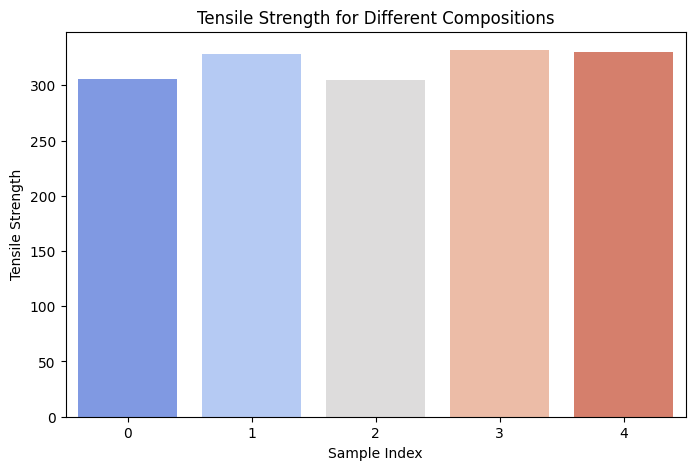

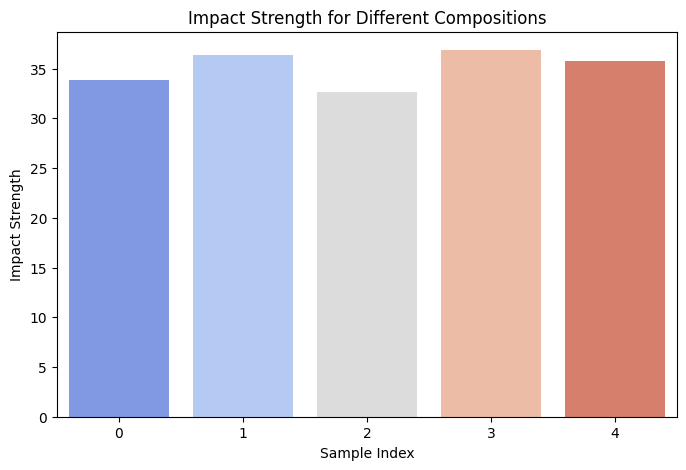

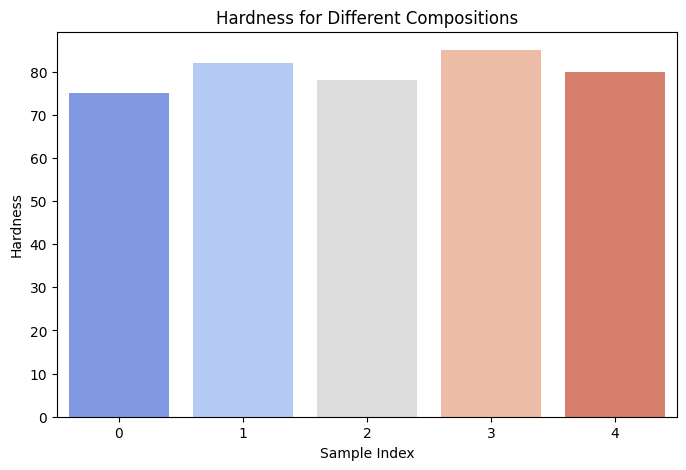

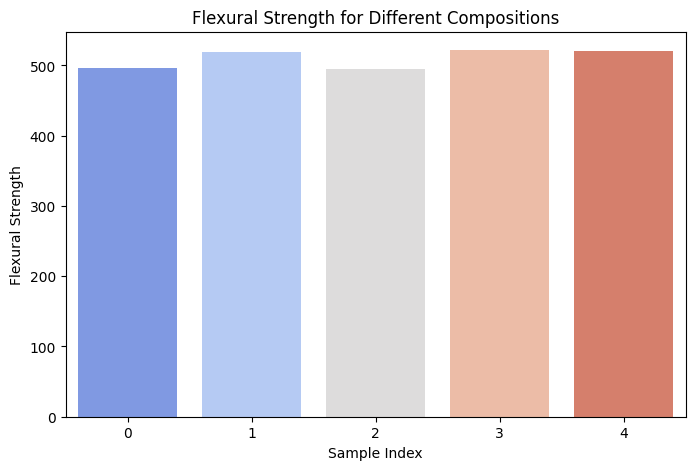

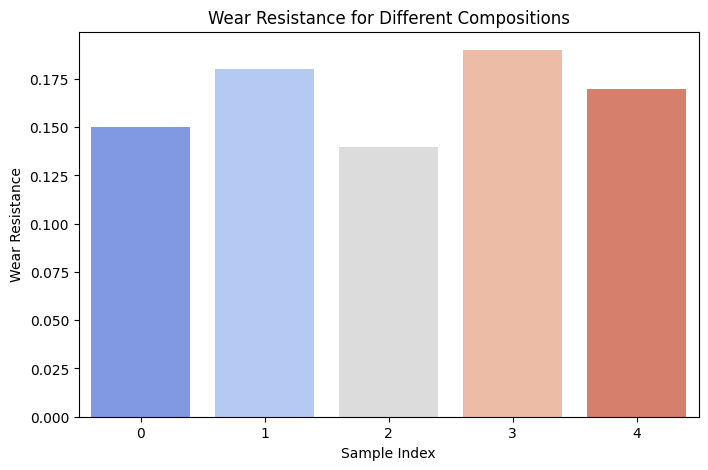

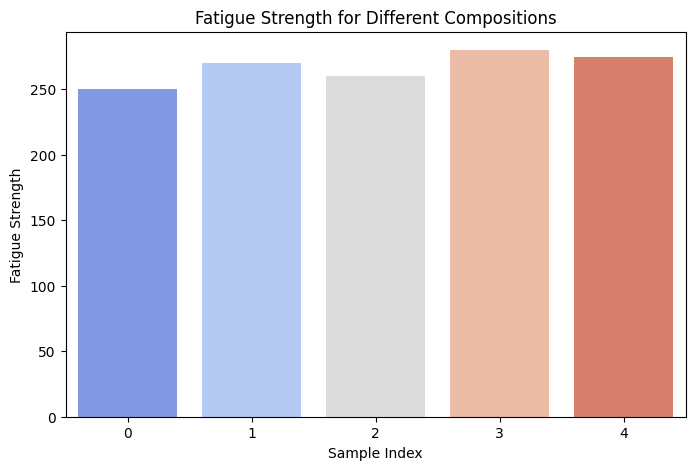

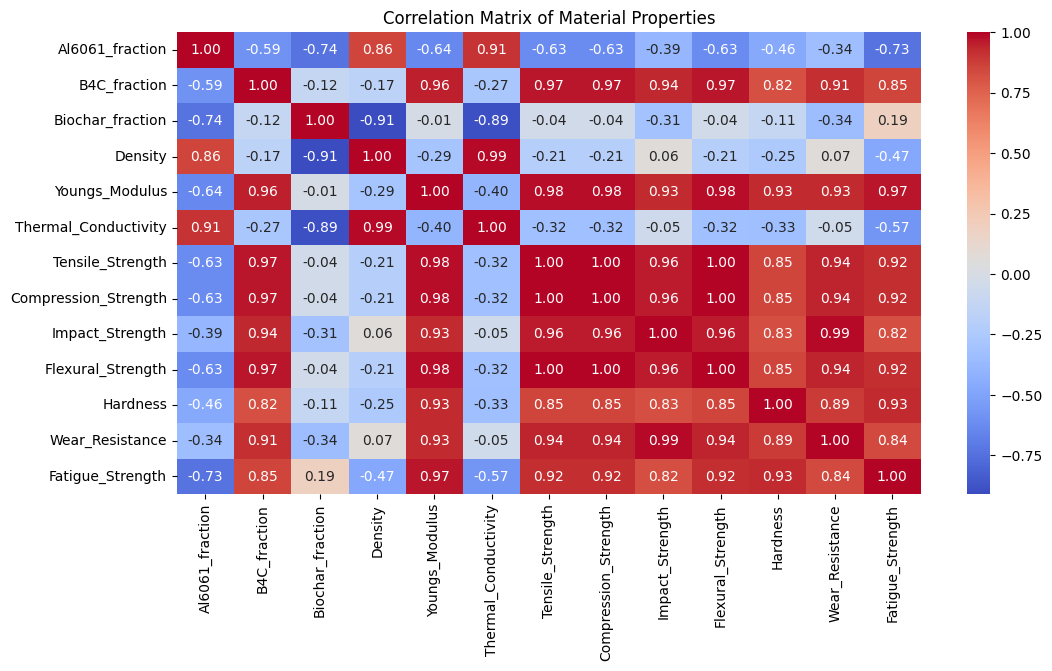

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

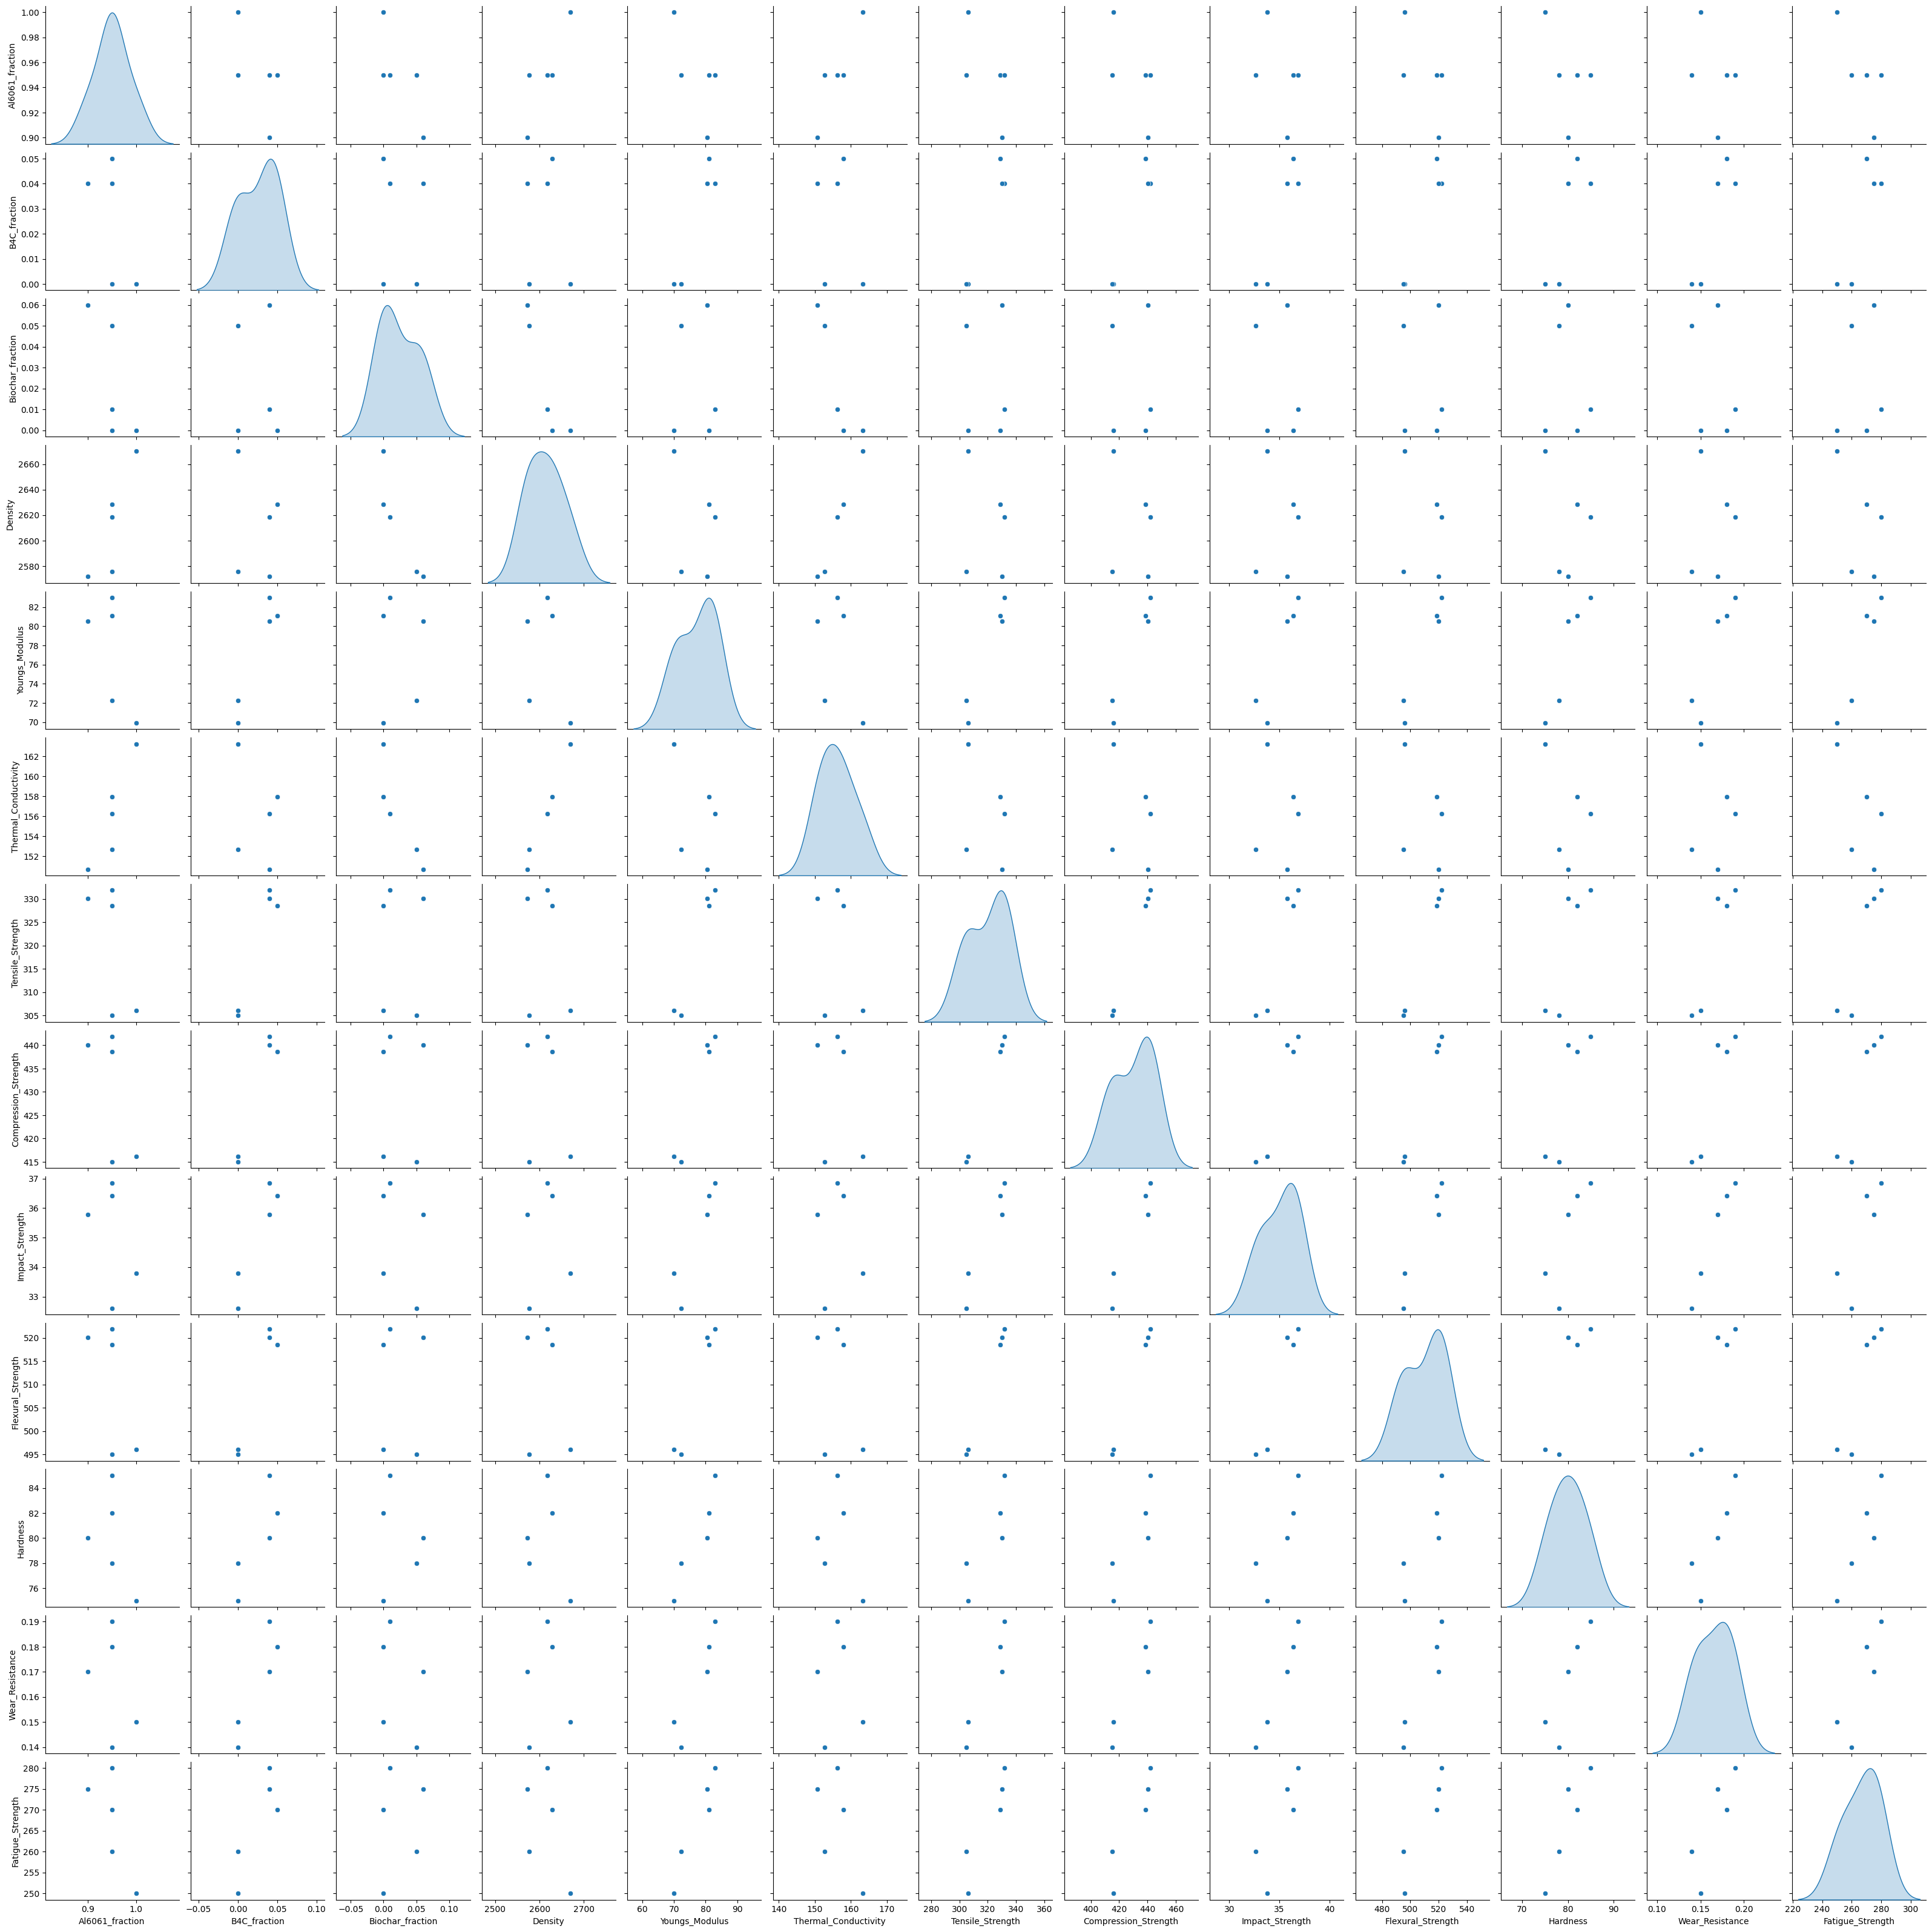

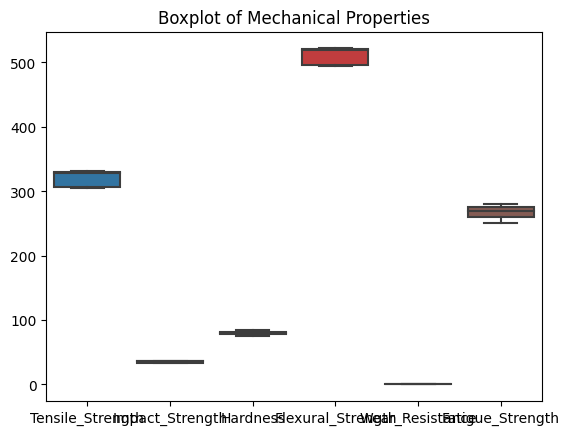

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Sample dataset (Replace with real experimental data)
data = {
    'Al6061_fraction': [1.0, 0.95, 0.95, 0.95, 0.90],
    'B4C_fraction': [0.0, 0.05, 0.0, 0.04, 0.04],
    'Biochar_fraction': [0.0, 0.0, 0.05, 0.01, 0.06],
    'Density': [2670.15, 2628.41, 2575.97, 2618.28, 2571.86],
    'Youngs_Modulus': [69.91, 81.07, 72.26, 83.00, 80.53],
    'Thermal_Conductivity': [163.25, 157.94, 152.70, 156.24, 150.72],
    'Tensile_Strength': [306.10, 328.60, 305.00, 331.90, 330.10],
    'Compression_Strength': [416.10, 438.60, 415.00, 441.90, 440.10],
    'Impact_Strength': [33.80, 36.41, 32.61, 36.86, 35.79],
    'Flexural_Strength': [496.10, 518.60, 495.00, 521.90, 520.10],
    'Hardness': [75, 82, 78, 85, 80],  # Hypothetical values
    'Wear_Resistance': [0.15, 0.18, 0.14, 0.19, 0.17],  # Hypothetical values
    'Fatigue_Strength': [250, 270, 260, 280, 275]  # Hypothetical values
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Visualizing each mechanical test separately
properties = ['Tensile_Strength', 'Impact_Strength', 'Hardness', 'Flexural_Strength', 'Wear_Resistance', 'Fatigue_Strength']

for prop in properties:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=df.index, y=df[prop], palette='coolwarm')
    plt.xlabel("Sample Index")
    plt.ylabel(prop.replace("_", " "))
    plt.title(f"{prop.replace('_', ' ')} for Different Compositions")
    plt.show()

# Correlation Matrix Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Material Properties")
plt.show()

# Pairplot Visualization
sns.pairplot(df, diag_kind='kde')
plt.show()

# Boxplot Visualization
sns.boxplot(data=df[properties])
plt.title("Boxplot of Mechanical Properties")
plt.show()


Tabulated Mechanical and Thermal Properties:
 Al6061_fraction  B4C_fraction  Biochar_fraction  Density  Youngs_Modulus  Thermal_Conductivity  Tensile_Strength  Compression_Strength  Impact_Strength  Flexural_Strength  Hardness  Wear_Resistance  Fatigue_Strength
            1.00          0.00              0.00  2670.15           69.91                163.25             306.1                 416.1            33.80              496.1        75             0.15               250
            0.95          0.05              0.00  2628.41           81.07                157.94             328.6                 438.6            36.41              518.6        82             0.18               270
            0.95          0.00              0.05  2575.97           72.26                152.70             305.0                 415.0            32.61              495.0        78             0.14               260
            0.95          0.04              0.01  2618.28           83.00              

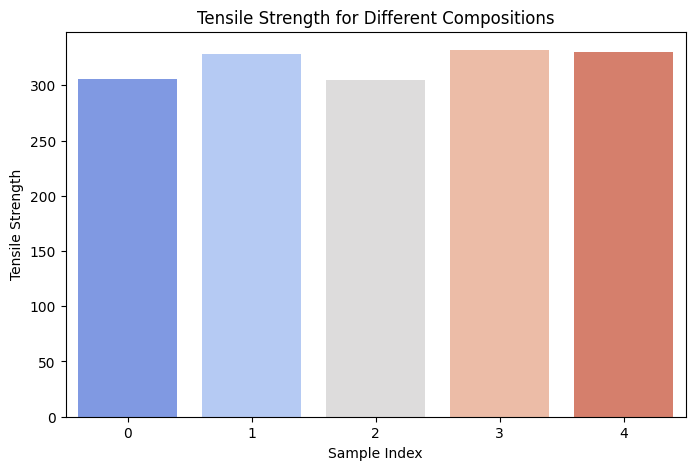

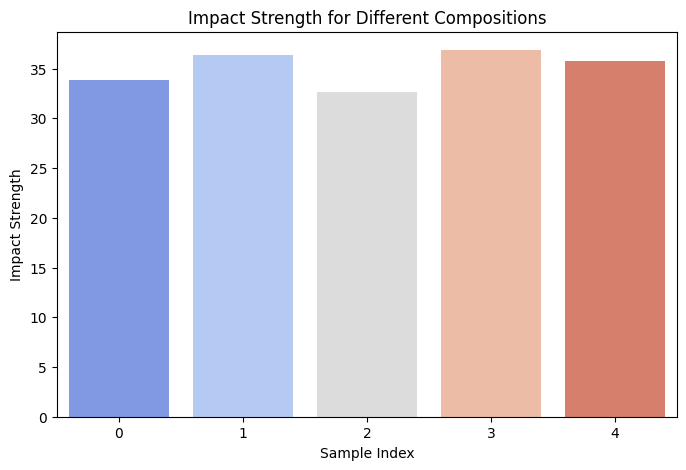

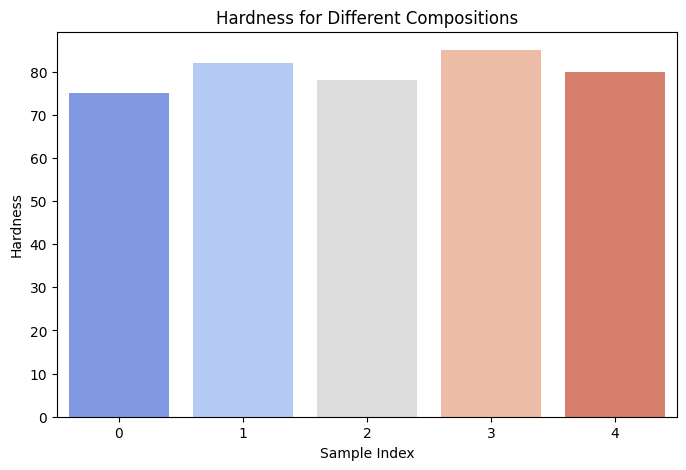

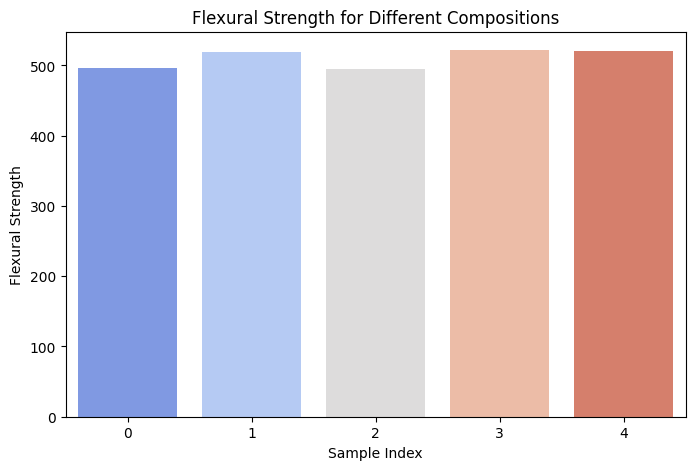

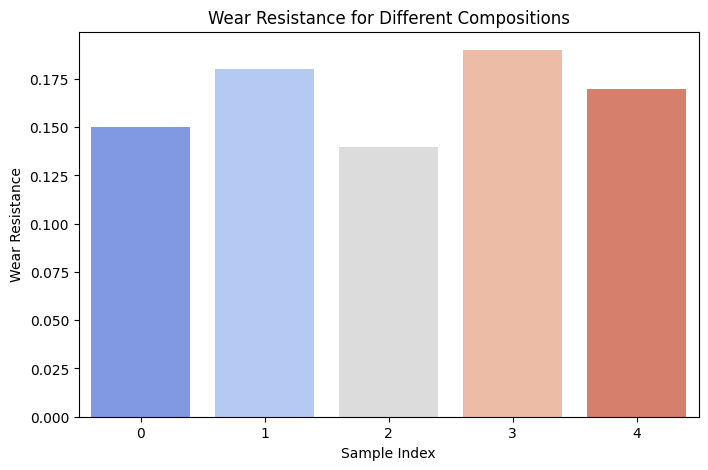

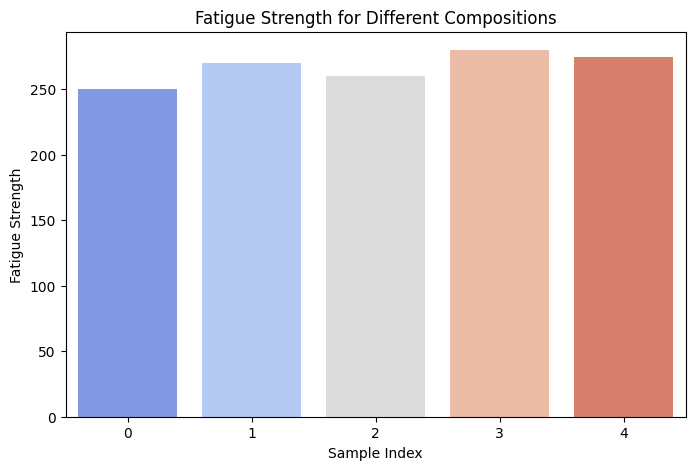

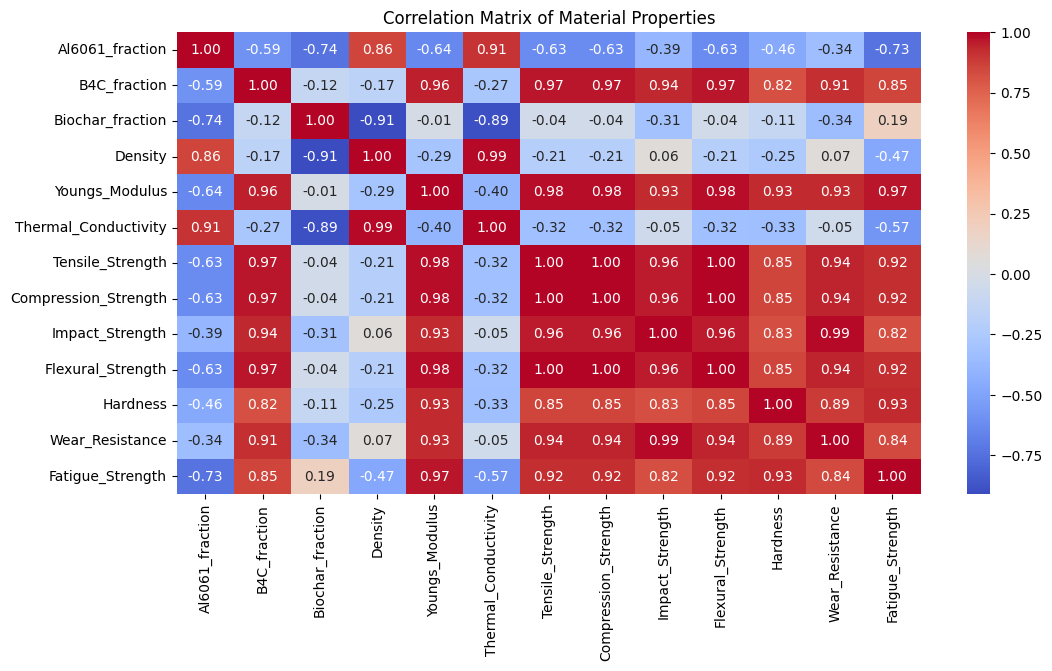

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

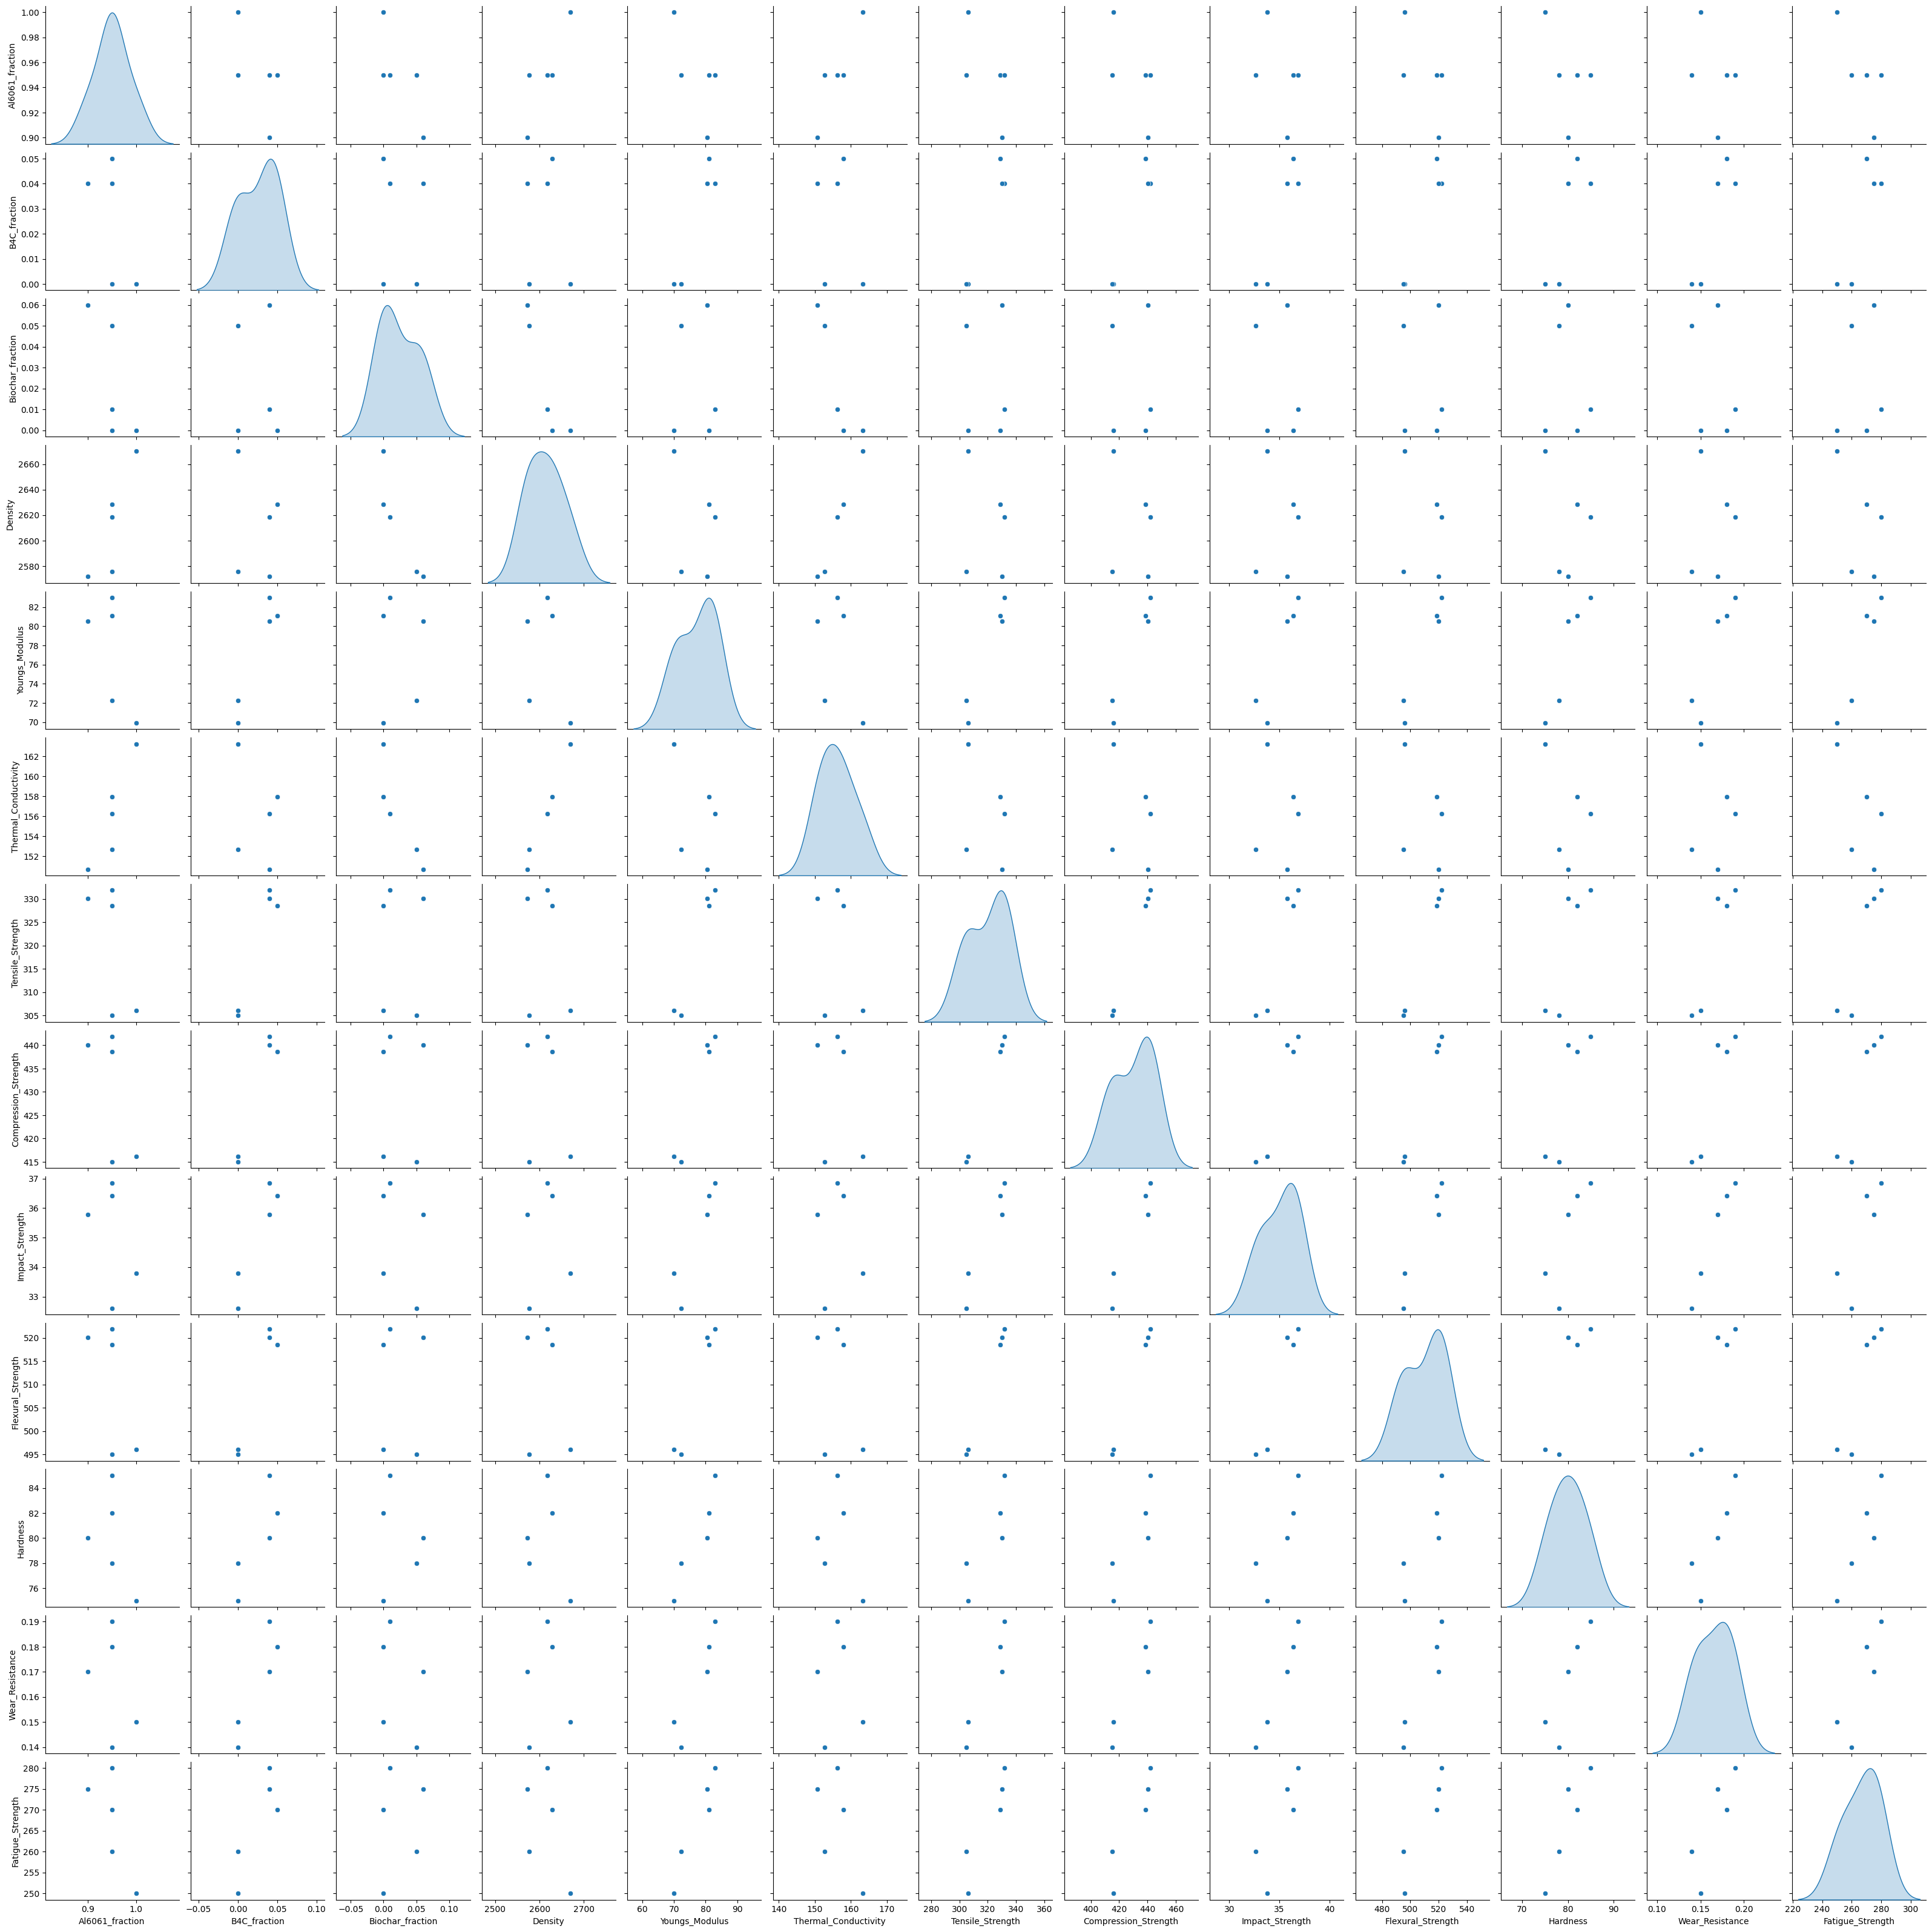

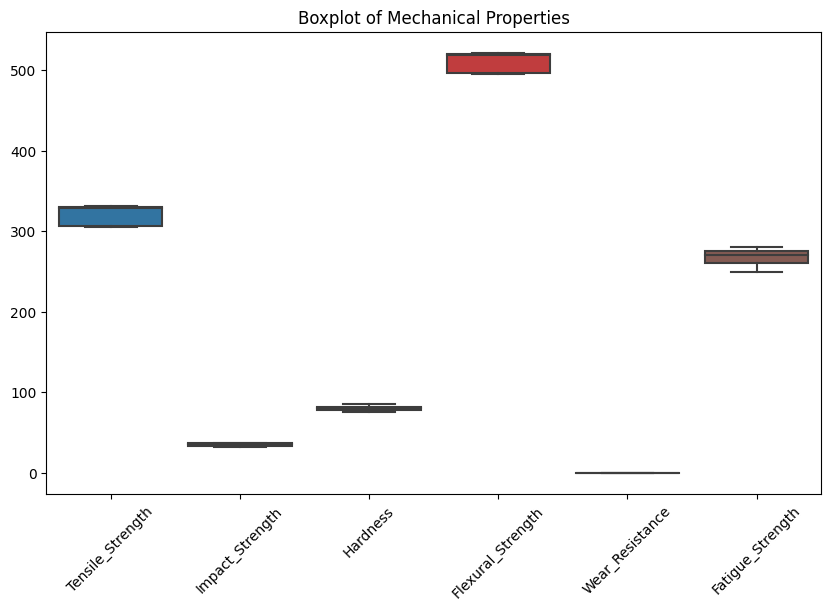

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Sample dataset (Replace with real experimental data)
data = {
    'Al6061_fraction': [1.0, 0.95, 0.95, 0.95, 0.90],
    'B4C_fraction': [0.0, 0.05, 0.0, 0.04, 0.04],
    'Biochar_fraction': [0.0, 0.0, 0.05, 0.01, 0.06],
    'Density': [2670.15, 2628.41, 2575.97, 2618.28, 2571.86],
    'Youngs_Modulus': [69.91, 81.07, 72.26, 83.00, 80.53],
    'Thermal_Conductivity': [163.25, 157.94, 152.70, 156.24, 150.72],
    'Tensile_Strength': [306.10, 328.60, 305.00, 331.90, 330.10],
    'Compression_Strength': [416.10, 438.60, 415.00, 441.90, 440.10],
    'Impact_Strength': [33.80, 36.41, 32.61, 36.86, 35.79],
    'Flexural_Strength': [496.10, 518.60, 495.00, 521.90, 520.10],
    'Hardness': [75, 82, 78, 85, 80],  # Hypothetical values
    'Wear_Resistance': [0.15, 0.18, 0.14, 0.19, 0.17],  # Hypothetical values
    'Fatigue_Strength': [250, 270, 260, 280, 275]  # Hypothetical values
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display tabulated data
print("Tabulated Mechanical and Thermal Properties:")
print(df.to_string(index=False))

# Visualizing each mechanical test separately
properties = ['Tensile_Strength', 'Impact_Strength', 'Hardness', 'Flexural_Strength', 'Wear_Resistance', 'Fatigue_Strength']

for prop in properties:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=df.index, y=df[prop], palette='coolwarm')
    plt.xlabel("Sample Index")
    plt.ylabel(prop.replace("_", " "))
    plt.title(f"{prop.replace('_', ' ')} for Different Compositions")
    plt.show()

# Correlation Matrix Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Material Properties")
plt.show()

# Pairplot Visualization
sns.pairplot(df, diag_kind='kde')
plt.show()

# Boxplot Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[properties])
plt.title("Boxplot of Mechanical Properties")
plt.xticks(rotation=45)
plt.show()